In [516]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import session_info


In [493]:
# Cargamos el dataset
df = pd.read_csv('/home/roy/Proyectos de Ciencia de Datos/data/Top_10K_Spotify_Clean.csv') # cargamos el dataset
df.head(2)

,Album_Type,Artist_Name,Artist_Song_Rank,Track_Name,Is_Playable,Album_Name,Release_Date,Total_Album_Tracks,Is_Explicit,Song_Duration,...,Track_Popularity,Gender,Age,Country,Genres,Artist_Popularity,Followers,Year,Month,Day
0,album,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,260,...,93,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6
1,album,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,247,...,91,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6


In [494]:
df_popularity = df.drop(columns=['Track_Name','Album_Name','Is_Playable','Genres','Release_Date']) # eliminamos las columnas que no nos interesan

In [495]:
df_popularity['Is_Explicit'] = df_popularity['Is_Explicit'].astype(int) # convertimos la columna a tipo entero para poder graficarla 
df_popularity['Gender'] = df_popularity['Gender'].map(
    {'male': 0,
     'female': 1,
     'mixed': 2,
     'other': 3}
    ) 
df_popularity['Album_Type'] = df_popularity['Album_Type'].map(
    {'album': 0,
     'single': 1,
     'compilation': 2}
    )

In [496]:
# Convertir la columna 'Country' a una columna de continentes
Country = df_popularity['Country'].unique()

# Diccionario de asignación de países a continentes
continent_assignment = {
    'CA': 'North America',
    'US': 'North America',
    'GB': 'Europe',
    'CO': 'Latin America',
    'PR': 'Latin America',
    'other': 'Other',  # Para los países que no tienen observaciones
    'NO': 'Europe',
    'FR': 'Europe',
    'AU': 'Asia and Oceania',
    'PA': 'Latin America',
    'SE': 'Europe',
    'DE': 'Europe',
    'NL': 'Europe',
    'BR': 'Latin America',
    'DK': 'Europe',
    'DO': 'Latin America',
    'AR': 'Latin America',
    'MX': 'Latin America',
    'JM': 'Latin America',
    'PH': 'Asia and Oceania',
    'KR': 'Asia and Oceania',
    'ES': 'Europe',
    'AT': 'Europe',
    'IT': 'Europe',
    'VE': 'Latin America',
    'NZ': 'Asia and Oceania',
    'IE': 'Europe',
    'TR': 'Asia and Oceania',
    'CU': 'Latin America',
    'BE': 'Europe',
    'RO': 'Europe'
}
# Crear una nueva columna 'Continent' en el DataFrame original
df_popularity['Continent'] = df_popularity['Country'].map(continent_assignment)


<AxesSubplot:xlabel='Continent'>

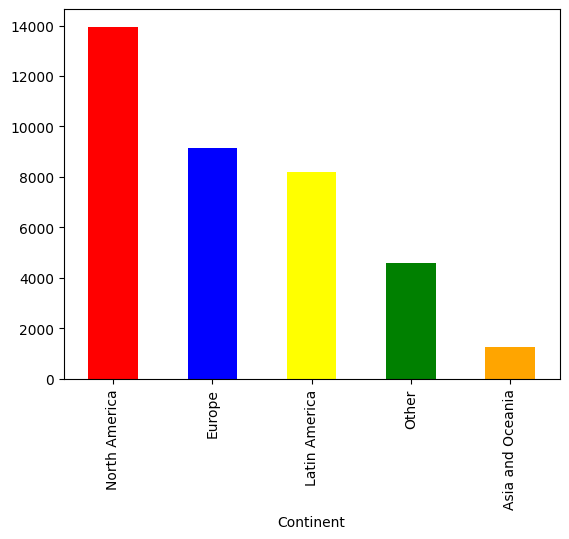

In [497]:
colors = ['red', 'blue', 'yellow', 'green', 'orange']
df_popularity.Continent.value_counts().plot(kind='bar', color=colors)

In [498]:
# Codificar la columna 'Continent' a valores numéricos para ver su correlación con la popularidad de la canción
df_popularity['Continent'] = df_popularity['Continent'].map(
    {'North America': 0,
     'Europe': 1,
     'Latin America': 2,
     'Asia and Oceania': 3,
     'Other': 4}
    )

In [499]:
# eliminamos la columnas que no nos interesan
# eliminamos algunos outliers para mejorar el modelo
df_popularity_model = df_popularity.drop(columns=['Country','Artist_Name','Day']) 
df_popularity_model = df_popularity_model[(df_popularity_model['Age'] > 0) 
                                          & (df_popularity_model['Year'] > 1980) 
                                          & (df_popularity_model['Song_Duration'] < 600 ) 
                                          ]



# **Analisis supervisado**

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Definimos las columnas que vamos a usar para entrenar el modelo
X_cols = list(set(df_popularity_model.columns) - set(['Track_Popularity']))
y_col = ['Track_Popularity']

# Convertimos los datos a arreglos de numpy
X = df_popularity_model[X_cols].values
y = df_popularity_model[y_col].values

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos los datos para que el modelo se ajuste mejor a ellos
scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [501]:
# generado un resumen de estadísticas del modelo de regresión lineal utilizando la biblioteca regressors
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1) 

In [502]:
# Imprimimos el resumen de estadísticas
y_test = y_test.reshape(-1)
print('==========Sumary=========')
stats.summary(model,X_test,y_test,X_cols)

==========Sumary=========
Residuals:
    Min      1Q  Median     3Q    Max
-2.4658 -0.2831 -0.0709 0.1788 4.8564


Coefficients:
                    Estimate  Std. Error   t value   p value
_intercept         -0.000000    0.004901   -0.0000  1.000000
Track_Number        0.003769    0.006218    0.6061  0.544470
Continent          -0.041210    0.004929   -8.3606  0.000000
Artist_Popularity   0.798656    0.006102  130.8882  0.000000
Age                -0.067140    0.006043  -11.1105  0.000000
Year               -0.023745    0.005403   -4.3951  0.000011
Month              -0.000008    0.004991   -0.0015  0.998777
Song_Duration      -0.010093    0.005218   -1.9345  0.053082
Gender             -0.037372    0.006195   -6.0323  0.000000
Is_Explicit         0.002665    0.005169    0.5155  0.606192
Artist_Song_Rank   -0.332893    0.004897  -67.9741  0.000000
Total_Album_Tracks -0.136187    0.006753  -20.1672  0.000000
Album_Type         -0.079467    0.005928  -13.4052  0.000000
Followers        

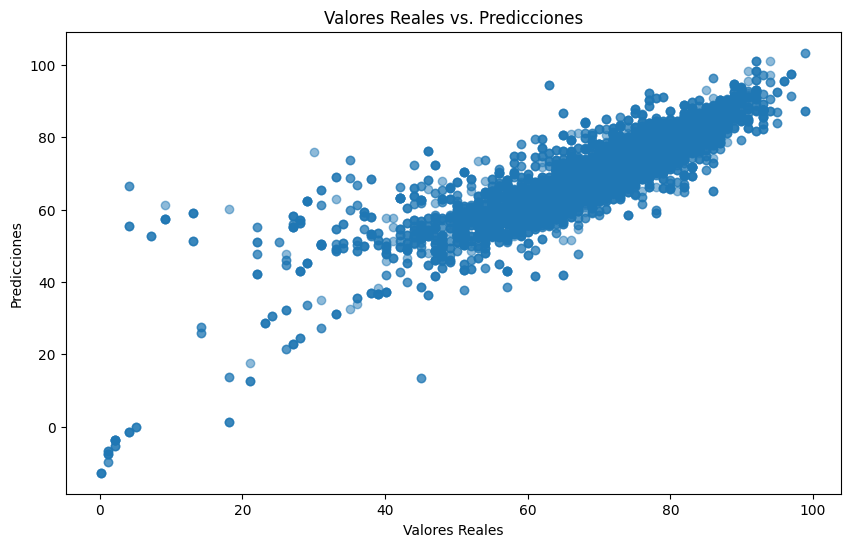

In [503]:
# graficamos los valores reales vs los valores predichos
y_test_2d = sc_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_2d = sc_y.inverse_transform(y_pred.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_2d, y_pred_2d, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

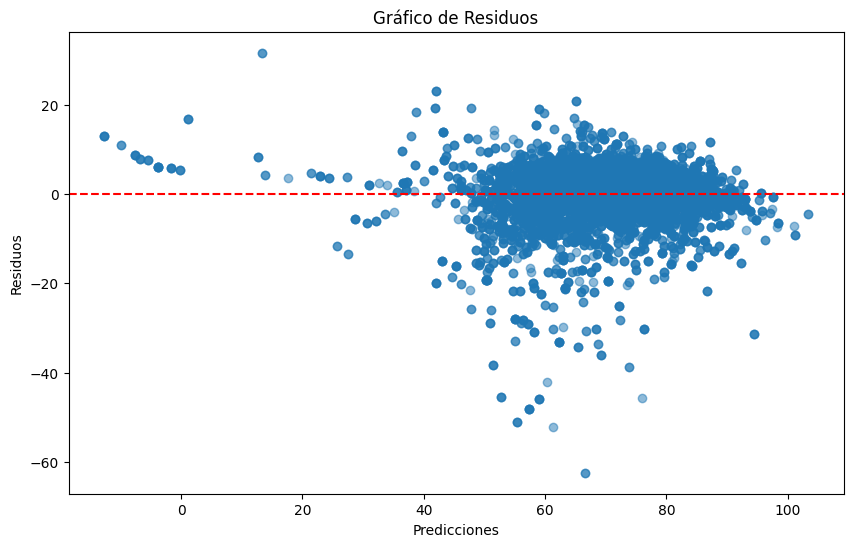

In [504]:
# Gráfico de residuos
residuos = y_test_2d - y_pred_2d
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_2d, residuos, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# **Analisis no supervisado** 

In [505]:
# Escalar los datos del conjunto de entrenamiento
df_popularity_model_scaled = scaler.fit_transform(df_popularity_model.drop('Track_Popularity', axis=1))


In [506]:
# Convertir el arreglo de NumPy en un DataFrame de Pandas
df_popularity_model_scaled = pd.DataFrame(df_popularity_model_scaled, columns=df_popularity_model.drop('Track_Popularity', axis=1).columns)
df_popularity_model_scaled.head(2)

,Album_Type,Artist_Song_Rank,Total_Album_Tracks,Is_Explicit,Song_Duration,Track_Number,Gender,Age,Artist_Popularity,Followers,Year,Month,Continent
0,-0.646199,-1.567070,1.352122,1.284482,1.127397,0.339561,-0.645592,0.497623,2.237335,4.111817,0.961011,0.913172,-0.923123
1,-0.646199,-1.218773,1.352122,1.284482,0.859517,0.163943,-0.645592,0.497623,2.237335,4.111817,0.961011,0.913172,-0.923123


In [507]:
# Importar la clase PCA desde la biblioteca sklearn.decomposition
from sklearn.decomposition import PCA

# Crear una instancia de la clase PCA
pca = PCA()

# Ajustar el modelo PCA a los datos estandarizados df_country_scaled
pca.fit(df_popularity_model_scaled)

# Transformar los datos originales en el espacio de las componentes principales
pca_data_scaled = pca.transform(df_popularity_model_scaled)
pca_data_scaled

array([[ 3.50609138, -0.14009706, -1.43996526, ...,  1.64480418,
         0.3097743 ,  0.50729465],
       [ 3.36583464, -0.12940501, -1.41969508, ...,  1.64646297,
         0.32773342,  0.58891017],
       [ 4.73676876, -0.04669937, -1.01275089, ...,  1.50574973,
         0.04444303, -0.5554795 ],
       ...,
       [-4.02769466, -2.45254832,  2.1361178 , ...,  1.64738072,
         0.69601684, -0.14791537],
       [-3.93714212, -2.58126024,  1.77641262, ...,  1.59109676,
         0.50678931, -0.24629003],
       [-3.99624444, -2.41996771,  2.23985766, ...,  1.62520505,
         0.67223676, -0.22864638]])

In [508]:
# imprimir la varianza explicada por cada componente principal
var = pca.explained_variance_ratio_
print(var) 

[0.1830966  0.13137437 0.11172323 0.10821161 0.07902361 0.07762713
 0.07024004 0.067735   0.05434368 0.04299161 0.02729429 0.0248534
 0.02148542]


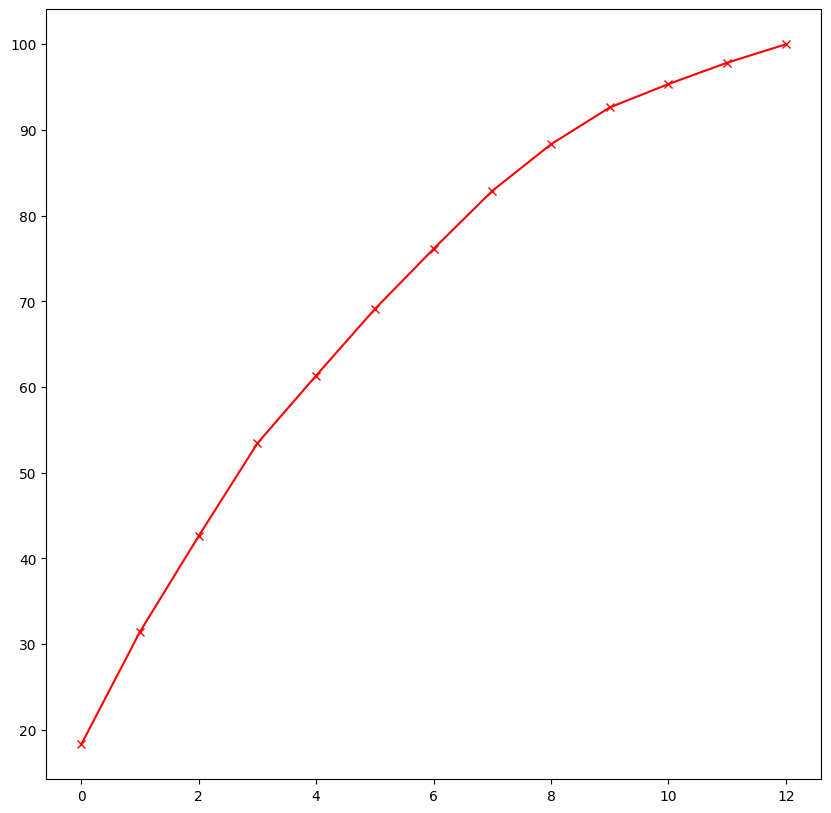

In [509]:
# Graficar la varianza acumulada de las componentes principales
cum_sum = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_sum,'r-x')
plt.show() 

In [510]:
# Escoger el número de componentes principales que expliquen el 95% de la varianza
pca_data_standar = pd.DataFrame(pca_data_scaled)
pca_data_standar.drop([9,10,11,12],axis=1 , inplace = True)
pca_data_standar.head(2)

,0,1,2,3,4,5,6,7,8
0,3.506091,-0.140097,-1.439965,-3.468263,-0.294189,1.360549,-0.655510,0.519392,0.877079
1,3.365835,-0.129405,-1.419695,-3.569833,-0.265935,1.063364,-0.549129,0.358308,0.637103


In [511]:
from sklearn.cluster import KMeans
# Inicializar listas vacías para almacenar la suma de distancias al cuadrado y el silhouette score
Sum_of_squared_distances = []

# rango de valores de k que vamos a probar
K = range(2,9)

# Iterar sobre cada valor de k
for k in K:
    # Crear una instancia del algoritmo KMeans con el número de clusters igual a k
    km = KMeans(n_clusters=k)
    
    # Aplicar el algoritmo KMeans a los datos estandarizados pca_data_standar
    km.fit(pca_data_standar)
    
    # Calcular y almacenar la suma de distancias al cuadrado (inertia) en la lista Sum_of_squared_distances
    Sum_of_squared_distances.append(km.inertia_)

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5e9227feb0>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-p

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5e9313c310>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

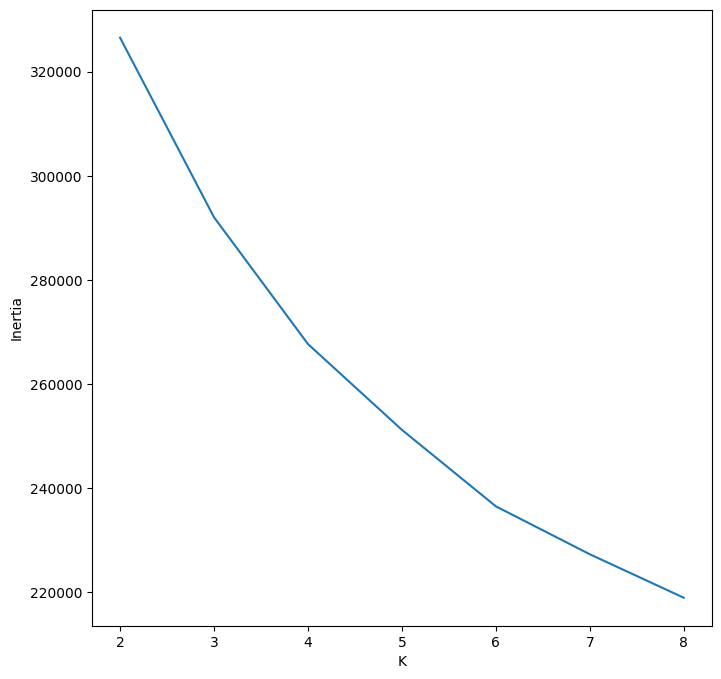

In [512]:
# Graficar la suma de distancias al cuadrado para cada valor de k para identificar el codo
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [513]:
# Establecer el número de clusters con base al grafico anterior
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_scaled)

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5e91b66560>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-p

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5e91b66560>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

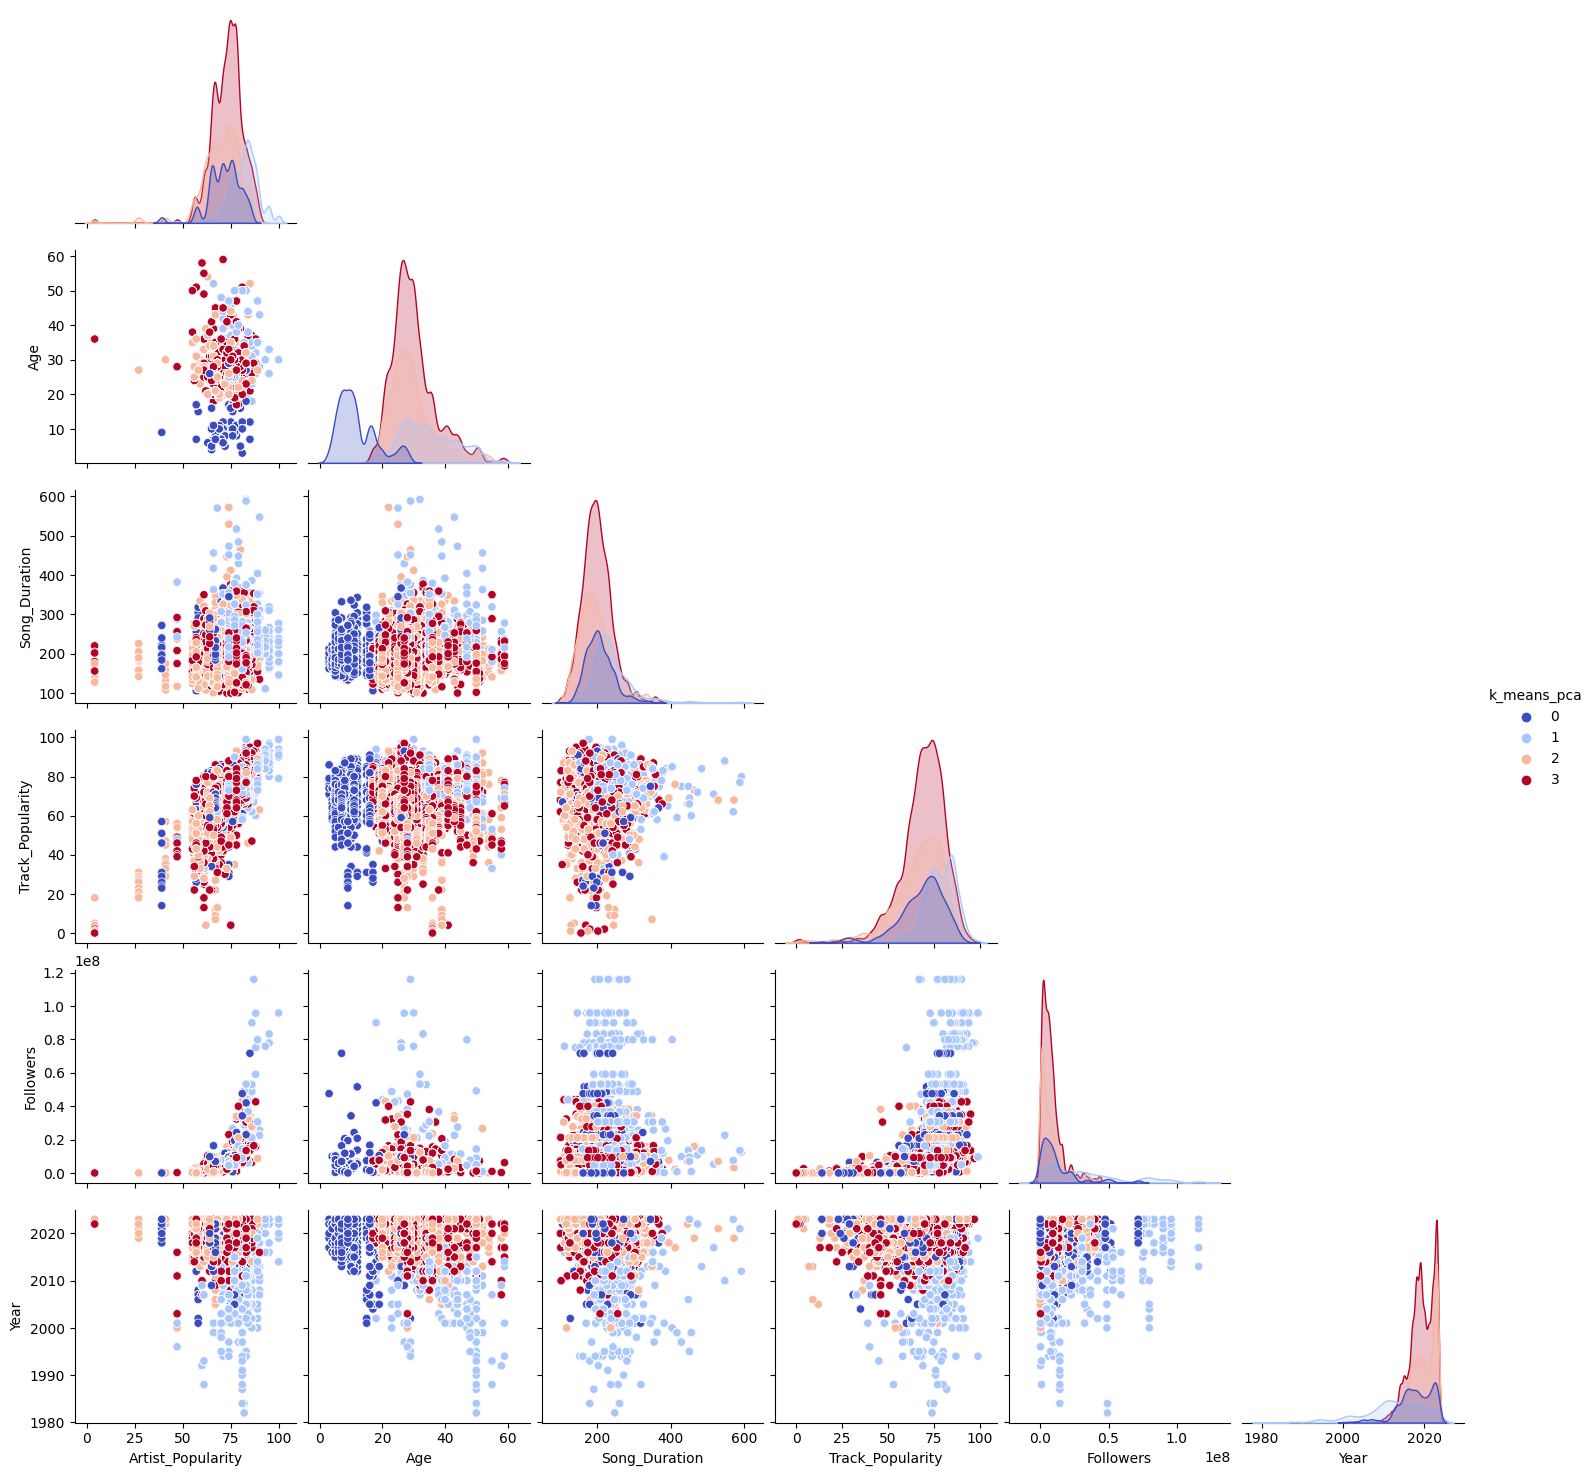

In [514]:
# Graficar los datos en el espacio de las componentes principales
df_popularity_model['k_means_pca'] = y
sns.pairplot(data=df_popularity_model[['Artist_Popularity','Age','Song_Duration','Track_Popularity','k_means_pca','Followers','Year']], hue='k_means_pca', palette='coolwarm', corner=True)


/tmp/ipykernel_453/1959150198.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df_popularity_model,x='Song_Duration',y='Followers',palette='Set1')


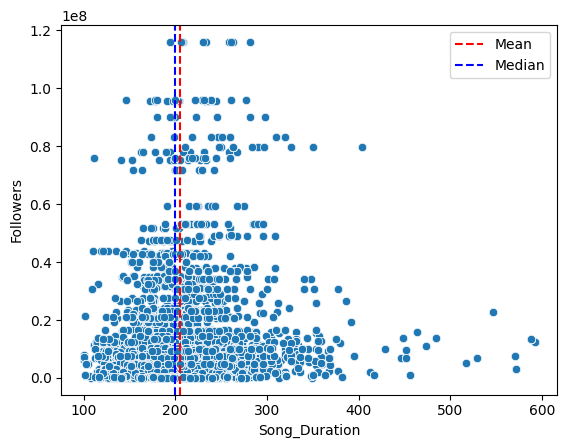

In [515]:
# Gráfico de dispersión de la duración de la canción vs. el número de seguidores
sns.scatterplot(df_popularity_model,x='Song_Duration',y='Followers',palette='Set1')
plt.axvline(df_popularity_model['Song_Duration'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_popularity_model['Song_Duration'].median(), color='blue', linestyle='--', label='Median')
plt.legend()


# Formulando conclusiones 

Podemos decir que el modelo de regresión lineal es bueno ya que tiene un \( R^2 \) de 0.75, lo cual nos permite predecir con un 75% de certeza la popularidad de una canción. Esto indica que el modelo tiene un buen ajuste a los datos.

Las variables que más influyen en la popularidad de una canción ordenadas en orden jerárquico son:

- Artist_Popularity (0.798656)
- Artist_Song_Rank (-0.332893)
- Age (-0.067140)
- Total_Album_Tracks (-0.136187)
- Album_Type (-0.079467)
- Year (-0.023745)
- Gender (-0.037372)
- Continent (-0.041210)

Y las que menos influyen en su popularidad son:

- Followers (-0.008487)
- Song_Duration (-0.010093)
- Is_Explicit (0.002665)
- Track_Number (0.003769)
- _intercept (-0.000000)
- Month (-0.000008)

Porloque nuestra pregunta a ¿Podemos predecir la popularidad de una canción basándonos en atributos como la duración, la explicitud y el país de origen del artista o alguna otra variable?

es si con las variables que mas influyen

De nuestro modelo de análisis no supervisado podemos decir varias tendencias sobre nuestra variable a analizar, Track_Popularity:

1. En nuestro gráfico de Follower vs Track_Popularity observamos que existe una agrupación de canciones populares que tienen muchos followers, por lo que los artistas con más followers tienen más probabilidades de que una de sus canciones sea muy popular.
   
2. Tenemos una tendencia positiva sobre la gráfica Artist_Popularity vs Track_Popularity.

Otras observaciones:

1. En la gráfica Followers vs Song_Duration tenemos una agrupación que significa que una canción que tiene una duración de menor a 360 segundos (6 min) suelen tener más followers y por lo tanto más popularidad, su media está en 200 seg (3.33333 min), lo que nos dice que si una canción dura 3.33333 minutos el artista tiende a tener más followers y por lo tanto ser más popular.


In [517]:
session_info.show()